# Tanzania Wells Analysis
## by Allison Ward, Sarah Prusaitis, and Monica Pecha

Business problem: A theoretical NGO is looking to asses the condition of hand pump and communal standpipe wells in the Lake Victoria basin. They have requested that we help them predict the likelihood of a well being functional or nonfunctional so that they can identify the wells in disrepair and fix them and/or build new ones. 

The dataset was taken from [DrivenData](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/), supplied by [Taarifa](https://taarifa.org/) and the [Tanzanian Ministry of Water](https://www.maji.go.tz/). 

Initial BLUF: Communal standpipe wells are more likely to be in need of repair
Wells with surface water as a source are more likely to be in need of repair
Mwanza is a region to learn from

# Exploratory Data Analysis (EDA)

## Part 1 - Initial EDA

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.impute import MissingIndicator, SimpleImputer

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

import scipy.stats as stats
from scipy.stats import chi2_contingency

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

In [257]:
pd.options.mode.copy_on_write = True

In [258]:
# Reading in our datasets to explore
df1 = pd.read_csv('data/test_set_values.csv')
df2= pd.read_csv('data/training_set_labels.csv')
df3 = pd.read_csv('data/training_set_values.csv')

In [259]:
df1.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [260]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13980 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [261]:
df2.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [262]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [263]:
df3.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


After looking at the data, we decided to merge dataframes 2 and 3, which include the independent and dependent variables that were provided as training materials. 

In [264]:
# merging dataframes 2 and 3 on id
df4 = df3.merge(df2, on = "id")
df4.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


Next, we dropped the columns that were duplicates of other columns or otherwise not relevant to the scope of our analysis. We also filtered the data for wells in the Lake Victoria basin that were eight communal standpipe wells or hand pump wells, as per the business problem.

In [265]:
# dropping irrelevant columns
to_drop = ["scheme_name", "id", "public_meeting", 'population', 'lga', 'permit', 'quantity', "payment_type", "ward", "management", "water_quality", "wpt_name", "installer", "funder", "source_type", "subvillage", "extraction_type", "extraction_type_group", "source", "scheme_management", "construction_year", "quantity_group", "waterpoint_type", "amount_tsh", "region_code", "district_code", "num_private", "date_recorded", "recorded_by"]
df4.drop(to_drop, axis=1, inplace = True)

In [266]:
# dropping any wells that are not located in the Lake Victoria basin (our stakeholder wants to focus on one region)
fdf = df4.drop(df4.index[df4['basin'] != 'Lake Victoria'])
fdf.head()

,gps_height,longitude,latitude,basin,region,extraction_type_class,management_group,payment,quality_group,source_class,waterpoint_type_group,status_group
1,1399,34.698766,-2.147466e+00,Lake Victoria,Mara,gravity,user-group,never pay,good,surface,communal standpipe,functional
4,0,31.130847,-1.825359e+00,Lake Victoria,Kagera,gravity,other,never pay,good,surface,communal standpipe,functional
9,0,30.626991,-1.257051e+00,Lake Victoria,Kagera,handpump,user-group,never pay,good,groundwater,hand pump,functional
18,1162,32.920154,-1.947868e+00,Lake Victoria,Mwanza,other,user-group,never pay,milky,groundwater,other,functional needs repair
21,0,0.000000,-2.000000e-08,Lake Victoria,Shinyanga,handpump,user-group,unknown,unknown,groundwater,hand pump,functional


In [267]:
# dropping any wells that are not a communal standpipe or hand pump
fdf2 = fdf[fdf['waterpoint_type_group'].isin(['communal standpipe', 'hand pump'])]

In [268]:
# renaming the column "status_group" to "target"
fdf2.rename(columns={"status_group": "target"}, inplace= True)
fdf2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8330 entries, 1 to 59385
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gps_height             8330 non-null   int64  
 1   longitude              8330 non-null   float64
 2   latitude               8330 non-null   float64
 3   basin                  8330 non-null   object 
 4   region                 8330 non-null   object 
 5   extraction_type_class  8330 non-null   object 
 6   management_group       8330 non-null   object 
 7   payment                8330 non-null   object 
 8   quality_group          8330 non-null   object 
 9   source_class           8330 non-null   object 
 10  waterpoint_type_group  8330 non-null   object 
 11  target                 8330 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 846.0+ KB


In [269]:
fdf2['target'].value_counts()

target
functional                 4527
non functional             2967
functional needs repair     836
Name: count, dtype: int64

In [270]:
# changing any row that says "functional needs repair" to "non functional"
fdf2.replace({'target': {'functional needs repair': 'non functional'}}, inplace=True)

In [271]:
fdf2['target'].value_counts()

target
functional        4527
non functional    3803
Name: count, dtype: int64

In [272]:
# dropping nulls in the 'permit' column
#fdf = filtered_df.dropna(subset=['permit'])

In [273]:
# resetting the index on our new dataframe
#fdf.reset_index()

In [274]:
# dropping the column 'basin' since we filtered for only datapoints in the Lake Victoria basin
#fdf.drop(['basin'], axis=1, inplace = True)
fdf2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8330 entries, 1 to 59385
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gps_height             8330 non-null   int64  
 1   longitude              8330 non-null   float64
 2   latitude               8330 non-null   float64
 3   basin                  8330 non-null   object 
 4   region                 8330 non-null   object 
 5   extraction_type_class  8330 non-null   object 
 6   management_group       8330 non-null   object 
 7   payment                8330 non-null   object 
 8   quality_group          8330 non-null   object 
 9   source_class           8330 non-null   object 
 10  waterpoint_type_group  8330 non-null   object 
 11  target                 8330 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 846.0+ KB


In [275]:
fdf2.replace({'extraction_type_class': {'handpump': 'manual'}}, inplace=True)
fdf2.replace({'extraction_type_class': {'gravity': 'other'}}, inplace=True)
fdf2.replace({'extraction_type_class': {'submersible': 'mechanical'}}, inplace=True)
fdf2.replace({'extraction_type_class': {'motorpump': 'mechanical'}}, inplace=True)
fdf2.replace({'extraction_type_class': {'rope pump': 'manual'}}, inplace=True)
fdf2.replace({'extraction_type_class': {'wind-powered': 'other'}}, inplace=True)
fdf2['extraction_type_class'].value_counts()

extraction_type_class
manual        5171
other         2346
mechanical     813
Name: count, dtype: int64

In [276]:
fdf2.replace({'quality_group': {'salty': 'other'}}, inplace=True)
fdf2.replace({'quality_group': {'milky': 'other'}}, inplace=True)
fdf2.replace({'quality_group': {'colored': 'other'}}, inplace=True)
fdf2.replace({'quality_group': {'fluoride': 'other'}}, inplace=True)
fdf2['quality_group'].value_counts()

quality_group
good       6976
other      1051
unknown     303
Name: count, dtype: int64

In [277]:
fdf2.replace({'payment': {'pay when scheme fails': 'other'}}, inplace=True)
fdf2.replace({'payment': {'pay monthly': 'other'}}, inplace=True)
fdf2.replace({'payment': {'pay per bucket': 'other'}}, inplace=True)
fdf2.replace({'payment': {'pay annually': 'other'}}, inplace=True)
fdf2['payment'].value_counts()

payment
never pay    5199
other        1872
unknown      1259
Name: count, dtype: int64

In [278]:
# uploaded this to a new csv to use in Tableau
#fdf.to_csv('df_v2.csv')

In [279]:
# # checking out value counts for our target variable
fdf2['target'].value_counts()

target
functional        4527
non functional    3803
Name: count, dtype: int64

In [280]:
# looking for correlations in our numeric variables
fdf2.corr(method='pearson', numeric_only=True)

,gps_height,longitude,latitude
gps_height,1.000000,0.332200,-0.022864
longitude,0.332200,1.000000,-0.821219
latitude,-0.022864,-0.821219,1.000000


In [281]:
# we are assuming this is in meters, however the data dictionary does not specify
fdf2['gps_height'].value_counts().head()

gps_height
0       6191
1161      15
1269      13
1209      13
1142      13
Name: count, dtype: int64

In [282]:
fdf2['gps_height'].describe()

count    8330.000000
mean      343.155582
std       589.799612
min         0.000000
25%         0.000000
50%         0.000000
75%      1145.000000
max      2056.000000
Name: gps_height, dtype: float64

In [283]:
fdf2['region'].value_counts()

region
Mwanza       2389
Kagera       2289
Shinyanga    1896
Mara         1724
Arusha         32
Name: count, dtype: int64

In [284]:
#fdf['population'].describe()

In [285]:
# histgram of population - most wells are located in areas with populations on 0
#sns.histplot(fdf, x='population');

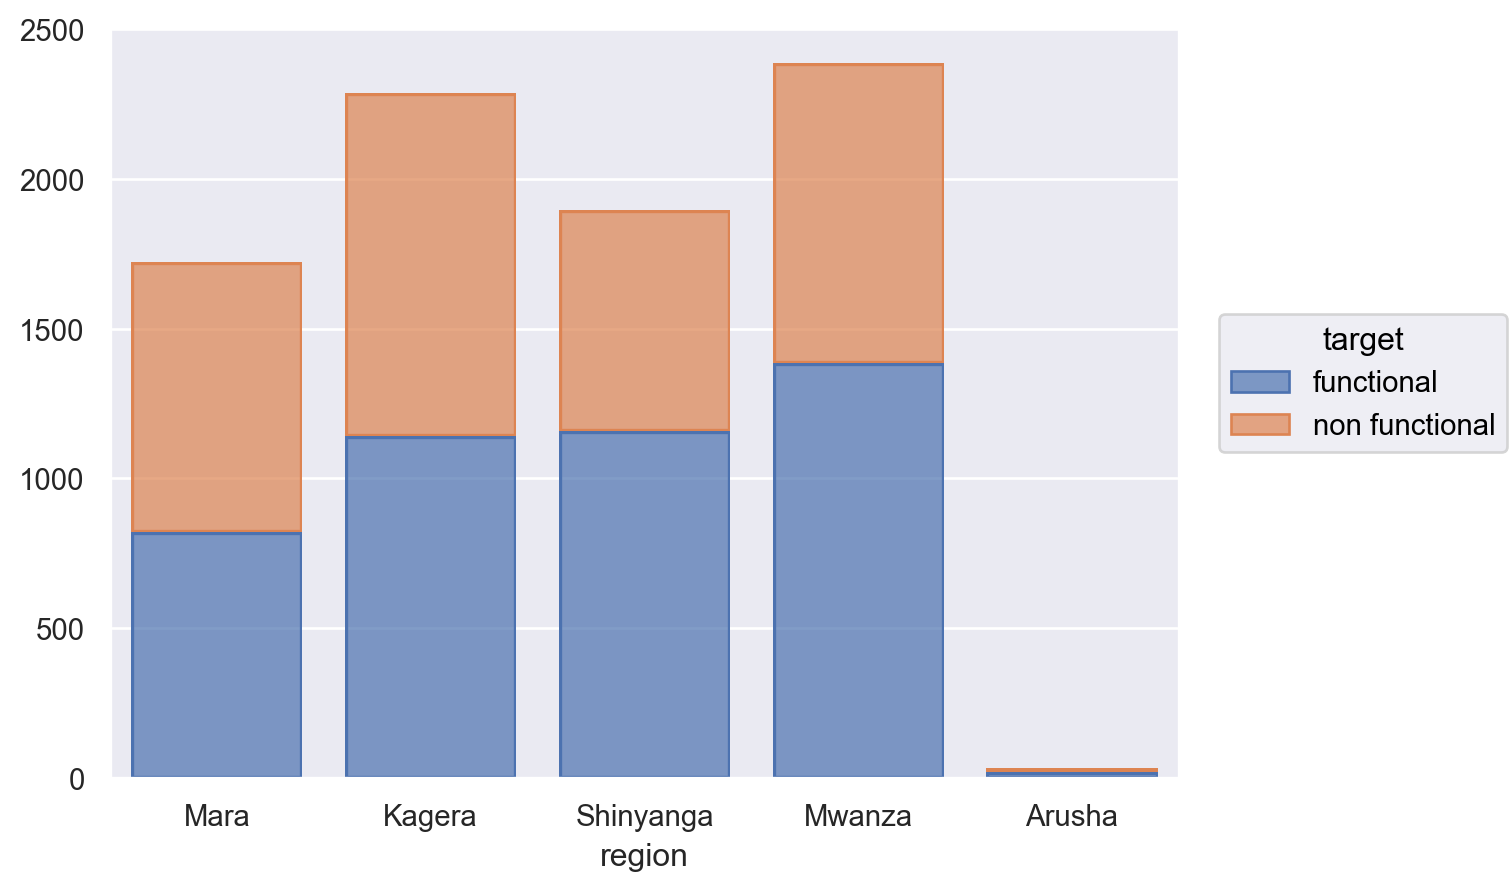

In [286]:
# comparing our target by region

#makes the plot bigger
so.Plot.config.display["scaling"] = 1.25

# the plot
so.Plot(fdf2, x="region", color="target").add(so.Bar(), so.Count(), so.Stack())

In [287]:
# stands for Local Government Authorities (LGAs) in Tanzania are accountable for the delivery of public services to citizens - 
# providing oversight and management support to health facilities, schools, and villages (https://www.usaid.gov/sites/default/files/2022-05/PS3_Case_Brief_-_LGA.pdf)
#fdf['lga'].value_counts()

In [288]:
print(fdf2['target'].loc[fdf2['extraction_type_class'] == 'manual'].value_counts(normalize=True) * 100)
print('___________')
print(fdf2['extraction_type_class'].loc[fdf2['target'] == 'functional'].value_counts(normalize=True) * 100)

target
functional        63.643396
non functional    36.356604
Name: proportion, dtype: float64
___________
extraction_type_class
manual        72.697150
other         21.515352
mechanical     5.787497
Name: proportion, dtype: float64


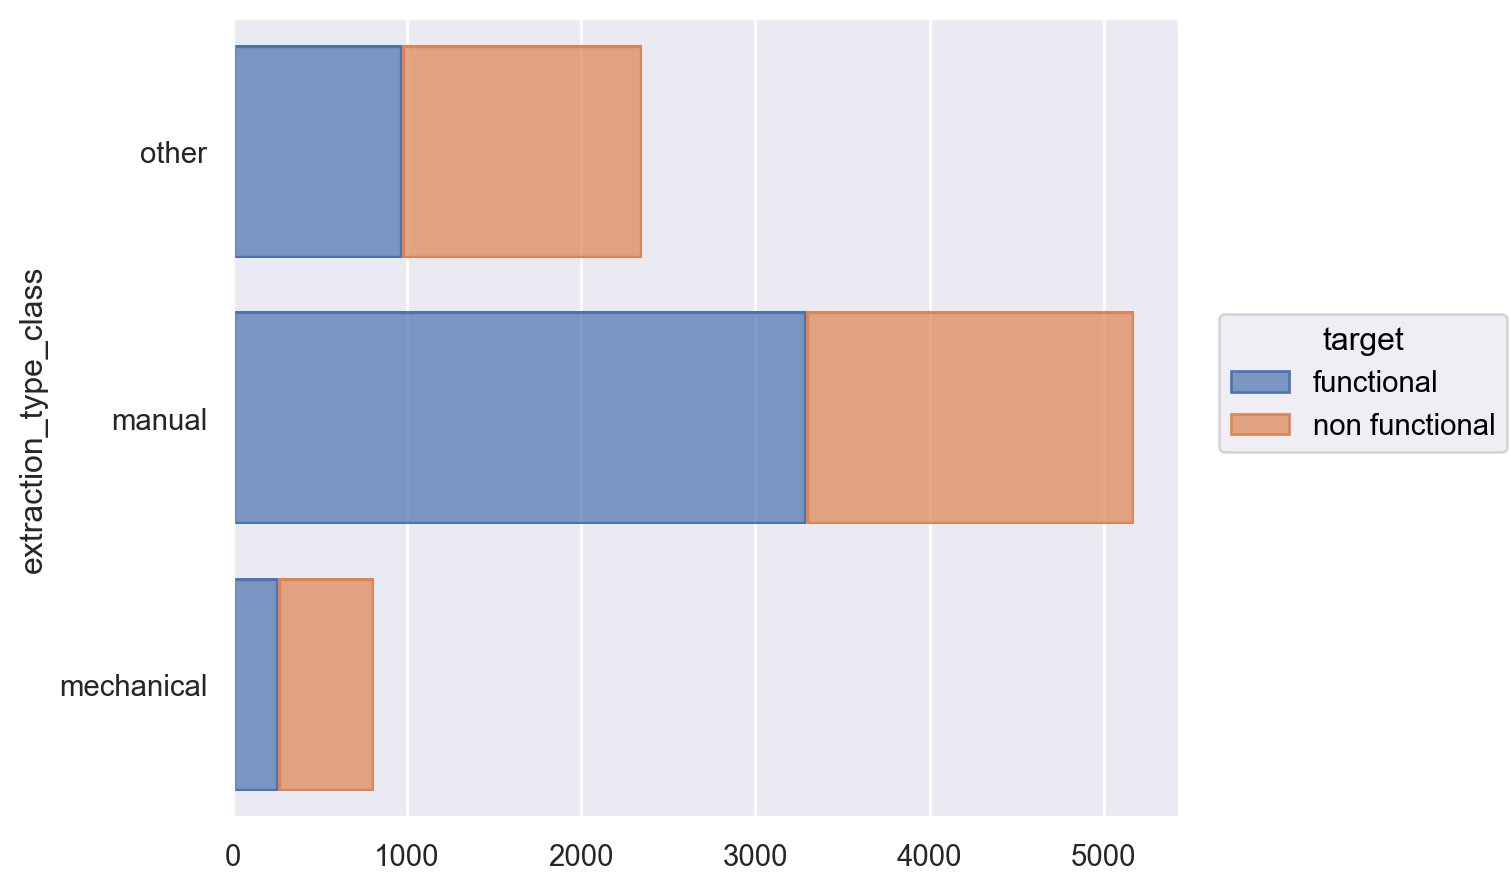

In [289]:
# comparing our target by extraction type
so.Plot(fdf2, y="extraction_type_class", color="target").add(so.Bar(), so.Count(), so.Stack())

In [290]:
fdf2["extraction_type_class"].value_counts(normalize=True) * 100

extraction_type_class
manual        62.076831
other         28.163265
mechanical     9.759904
Name: proportion, dtype: float64

In [291]:
print(fdf2['payment'].loc[fdf2['target'] == 'non functional'].value_counts(normalize=True))
print('___________')
print(fdf2['payment'].loc[fdf2['target'] == 'functional'].value_counts(normalize=True))

payment
never pay    0.670786
other        0.168025
unknown      0.161189
Name: proportion, dtype: float64
___________
payment
never pay    0.584935
other        0.272366
unknown      0.142699
Name: proportion, dtype: float64


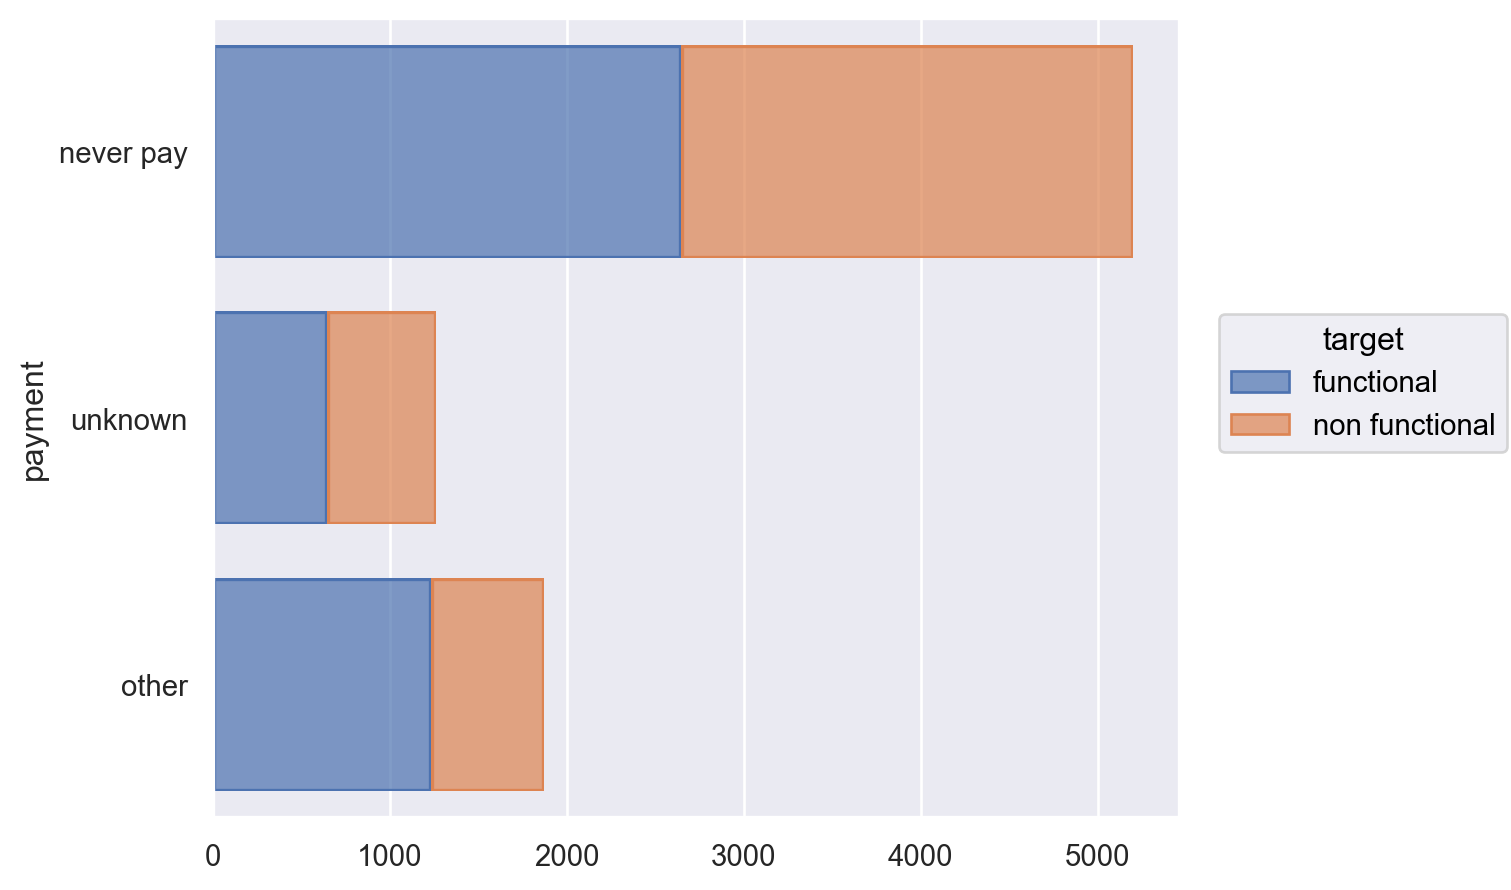

In [292]:
# comparing payment method and target
so.Plot(fdf2, y="payment", color="target").add(so.Bar(), so.Count(), so.Stack())

In [293]:
print(fdf2['waterpoint_type_group'].loc[fdf2['target'] == 'non functional'].value_counts(normalize=True))
print('___________')
print(fdf2['waterpoint_type_group'].loc[fdf2['target'] == 'functional'].value_counts(normalize=True))

waterpoint_type_group
hand pump             0.510387
communal standpipe    0.489613
Name: proportion, dtype: float64
___________
waterpoint_type_group
hand pump             0.735145
communal standpipe    0.264855
Name: proportion, dtype: float64


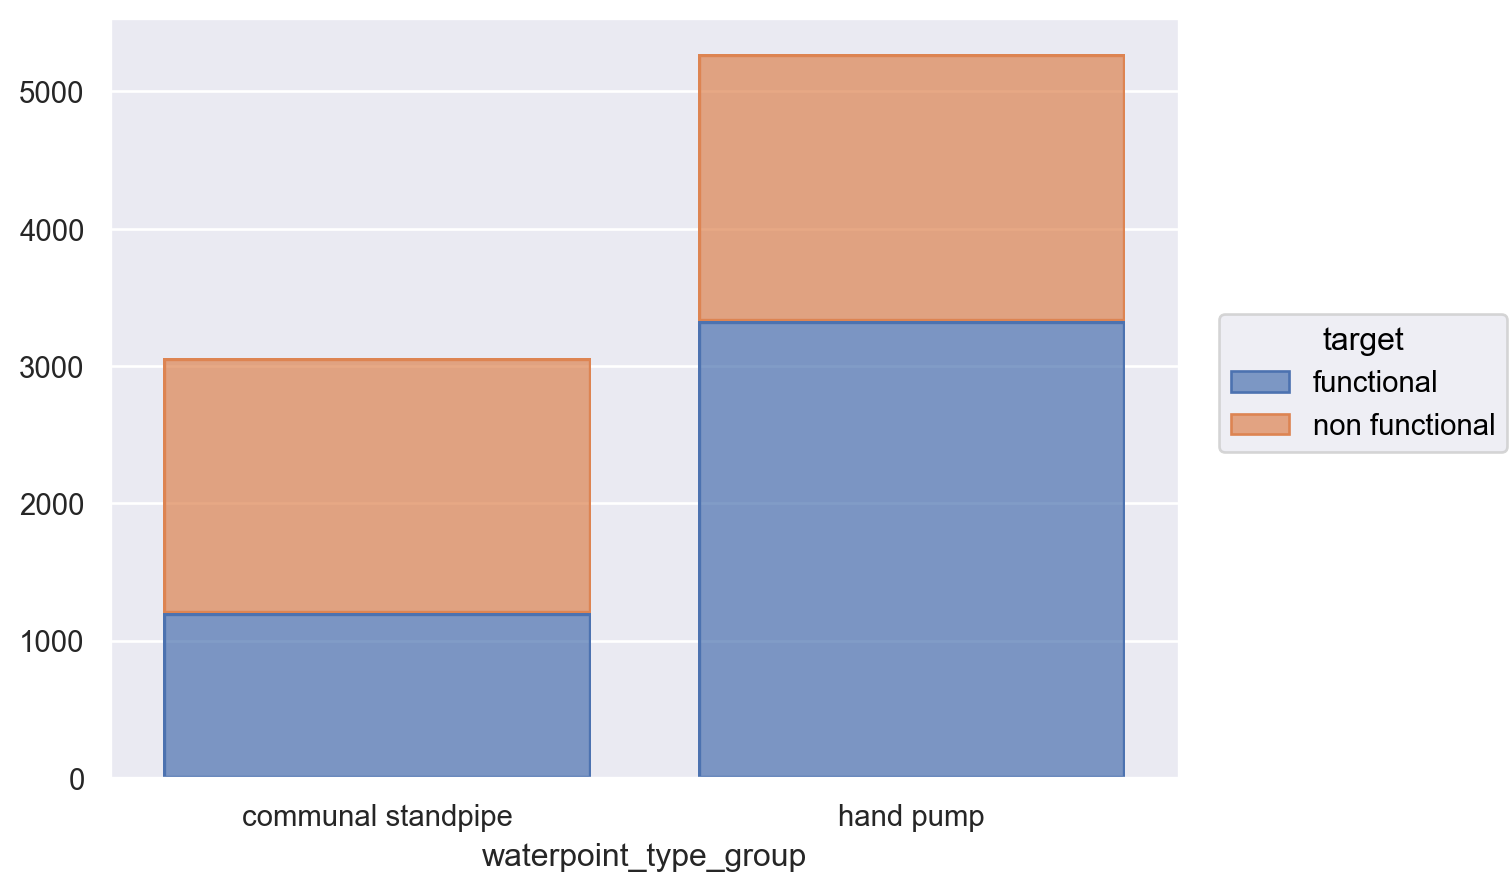

In [294]:
# comparing waterpoint type and target
so.Plot(fdf2, x="waterpoint_type_group", color="target").add(so.Bar(), so.Count(), so.Stack())

In [295]:
print(fdf2['quality_group'].loc[fdf2['target'] == 'non functional'].value_counts(normalize=True))
print('___________')
print(fdf2['quality_group'].loc[fdf2['target'] == 'functional'].value_counts(normalize=True))

quality_group
good       0.824612
other      0.115961
unknown    0.059427
Name: proportion, dtype: float64
___________
quality_group
good       0.848244
other      0.134747
unknown    0.017009
Name: proportion, dtype: float64


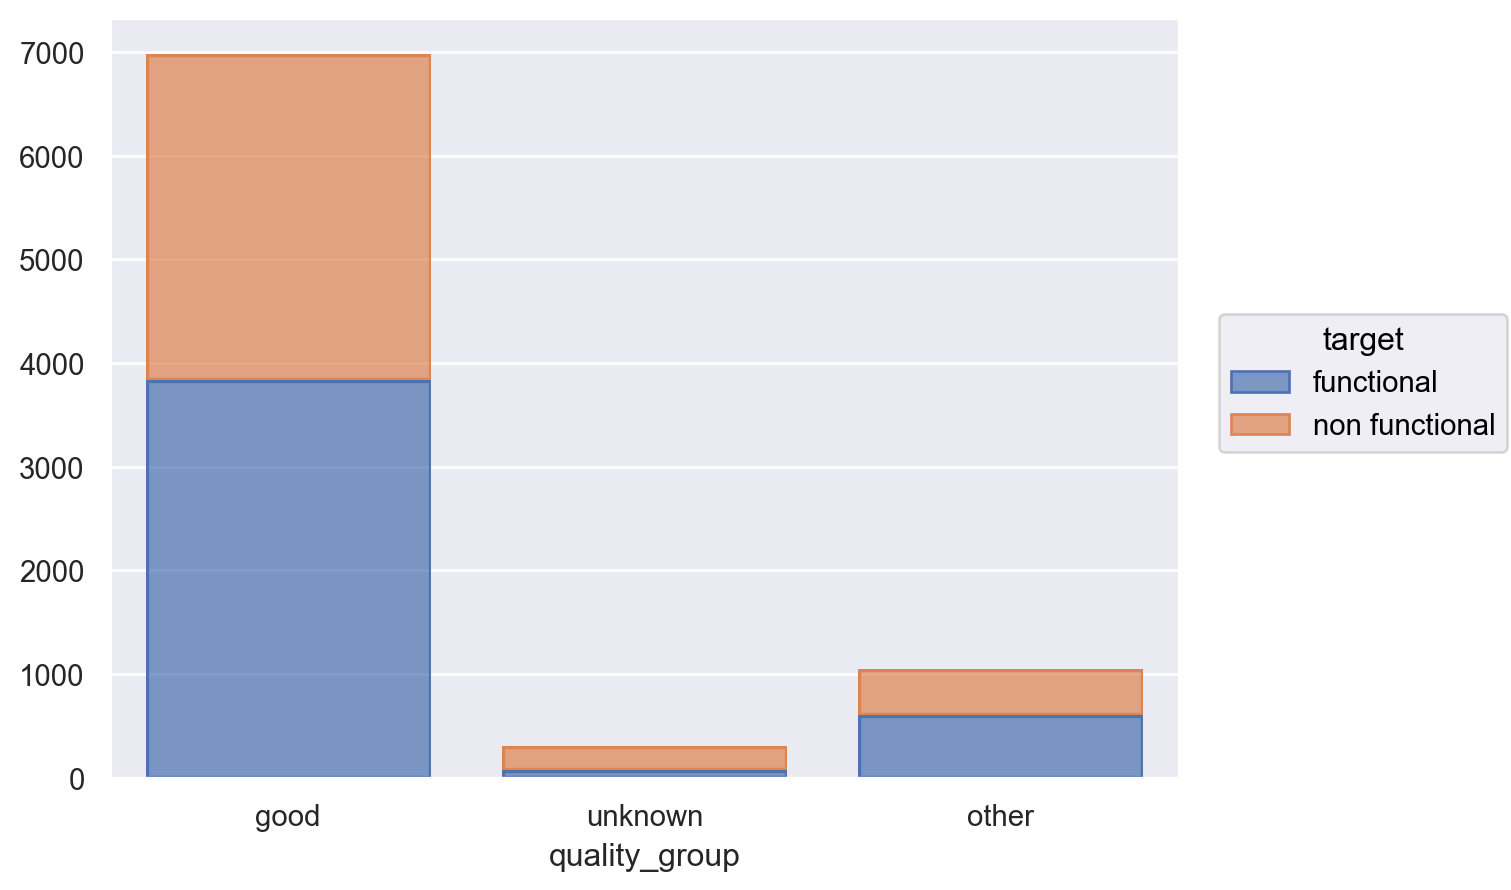

In [296]:
so.Plot(fdf2, x="quality_group", color="target").add(so.Bar(), so.Count(), so.Stack())

In [297]:
fdf2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8330 entries, 1 to 59385
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gps_height             8330 non-null   int64  
 1   longitude              8330 non-null   float64
 2   latitude               8330 non-null   float64
 3   basin                  8330 non-null   object 
 4   region                 8330 non-null   object 
 5   extraction_type_class  8330 non-null   object 
 6   management_group       8330 non-null   object 
 7   payment                8330 non-null   object 
 8   quality_group          8330 non-null   object 
 9   source_class           8330 non-null   object 
 10  waterpoint_type_group  8330 non-null   object 
 11  target                 8330 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 1.1+ MB


In [298]:
fdf2.to_csv('final_df.csv')

## Part 2 - Statistical Analysis

After our initial EDA, we decided to perform some statistical tests to see if any of our variables are highly correlated. Since we are comparing categorical variables, we decided to use a Chi-Squared test of independence. 

In [299]:
# comparing extraction type and source
homogeneity_table1 = pd.crosstab(fdf2["extraction_type_class"], fdf2["source_class"])
homogeneity_table1

source_class,groundwater,surface,unknown
extraction_type_class,,,
manual,5146,20,5
mechanical,396,416,1
other,1195,1142,9


In [300]:
# performing chi-squared
chi2, p, dof, ex = stats.chi2_contingency(homogeneity_table1)

print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 3074.33292231809
p-value: 0.0


In [301]:
# comparing waterpoint type and source class
homogeneity_table2 = pd.crosstab(fdf2["waterpoint_type_group"], fdf2["source_class"])
homogeneity_table2

source_class,groundwater,surface,unknown
waterpoint_type_group,,,
communal standpipe,1513,1543,5
hand pump,5224,35,10


In [302]:
# performing chi-squared
chi2, p, dof, ex = stats.chi2_contingency(homogeneity_table2)

print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 3120.9459742088507
p-value: 0.0


In [303]:
# comparing extraction type and source
homogeneity_table3 = pd.crosstab(fdf2["extraction_type_class"], fdf2["source_class"])
homogeneity_table3

source_class,groundwater,surface,unknown
extraction_type_class,,,
manual,5146,20,5
mechanical,396,416,1
other,1195,1142,9


In [304]:
# performing chi-squared
chi2, p, dof, ex = stats.chi2_contingency(homogeneity_table3)

print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 3074.33292231809
p-value: 0.0


In [305]:
# comparing extraction type and waterpoint type
homogeneity_table4 = pd.crosstab(fdf2["extraction_type_class"], fdf2["waterpoint_type_group"])
homogeneity_table4

waterpoint_type_group,communal standpipe,hand pump
extraction_type_class,,
manual,63,5108
mechanical,803,10
other,2195,151


In [306]:
# performing chi-squared
chi2, p, dof, ex = stats.chi2_contingency(homogeneity_table4)

print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 7411.935370052781
p-value: 0.0


# Performing Train-Test Split

After our EDA was complete, we split the data into a training and testing set to make sure there is no data leakage. This was before performing any preprocessing steps. 

We determined, using domain knowledge, that latitude, longitude, and gps height (aka altitude) would be highly multicolinear, and therefore should be left out of our training and testing data. 

In [307]:
# train-test split

X = fdf2.drop(["target", "latitude", "longitude", "basin", "gps_height"], axis=1)
y = fdf2["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [308]:
# checking the shapes to make sure they look correct
X_train.shape

(6247, 7)

In [309]:
# checking the shapes to make sure they look correct
y_train.shape

(6247,)

In [310]:
# checking the shapes to make sure they look correct
X_test.shape

(2083, 7)

In [311]:
# checking the shapes to make sure they look correct
y_test.shape

(2083,)

In [312]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6247 entries, 18254 to 42088
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   region                 6247 non-null   object
 1   extraction_type_class  6247 non-null   object
 2   management_group       6247 non-null   object
 3   payment                6247 non-null   object
 4   quality_group          6247 non-null   object
 5   source_class           6247 non-null   object
 6   waterpoint_type_group  6247 non-null   object
dtypes: object(7)
memory usage: 390.4+ KB


# Preprocessing

Our first preprocessing step was performing One Hot Encoding on our variables. Since all of our remaining variables are categorical, and we are not missing any values, this was relatively straightforward. 

In [313]:
# isolating categorical columns
cat_columns = X_train[['region', 'extraction_type_class', 'management_group', 'payment', 'quality_group', 'source_class', 'waterpoint_type_group']].copy()

# instantiate the OneHotEncoder
ohe = OneHotEncoder(drop='first')

# fit the ohe on our training set
ohe.fit(cat_columns)

# transform columns and convert our encoded matrix back into a dataframe
X_train_encoded = pd.DataFrame(ohe.transform(cat_columns).todense(),
                               columns=ohe.get_feature_names_out())

X_train_encoded.head()

,region_Kagera,region_Mara,region_Mwanza,region_Shinyanga,extraction_type_class_mechanical,extraction_type_class_other,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,payment_other,payment_unknown,quality_group_other,quality_group_unknown,source_class_surface,source_class_unknown,waterpoint_type_group_hand pump
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [314]:
# Reset the index of X_train numeric columns and X_train encoded categorical variables
#X_train_num_reset = X_train['population'].reset_index(drop=True)
#X_train_encoded_cats_reset = X_train_encoded_cats.reset_index(drop=True)

# Concatenate the two dataframes
#X_train_encoded = pd.concat([X_train_num_reset, X_train_encoded_cats_reset], axis=1)

# checking our work
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6247 entries, 0 to 6246
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   region_Kagera                     6247 non-null   float64
 1   region_Mara                       6247 non-null   float64
 2   region_Mwanza                     6247 non-null   float64
 3   region_Shinyanga                  6247 non-null   float64
 4   extraction_type_class_mechanical  6247 non-null   float64
 5   extraction_type_class_other       6247 non-null   float64
 6   management_group_other            6247 non-null   float64
 7   management_group_parastatal       6247 non-null   float64
 8   management_group_unknown          6247 non-null   float64
 9   management_group_user-group       6247 non-null   float64
 10  payment_other                     6247 non-null   float64
 11  payment_unknown                   6247 non-null   float64
 12  qualit

# Baseline (Dummy) Model

After performing our preprocessing, we performed a baseline model using SKLearn's Dummy Classifier to determine the value of our target that appears most frequently. 

In [315]:
# Instantiate the model
dummy_model = DummyClassifier(strategy="most_frequent")

# fitting the model to our newly encoded dataset
dummy_model.fit(X_train_encoded, y_train)

# predicting the first 10
dummy_y = dummy_model.predict(X_train_encoded)[:10]

In [316]:
#print(classification_report(y_train, dummy_y))
print(y_train.value_counts(normalize=True))
#print(dummy_y.value_counts(normalize=True))

target
functional        0.543461
non functional    0.456539
Name: proportion, dtype: float64


In [317]:
# transforming the test set with our encoded variables, making sure to TRANSFORM but NOT FIT to the test group
#cat_columns2 = X_test[['region', 'lga', 'permit', 'extraction_type_class', 'management_group', 'payment', 'quality_group', 'source_class', 'waterpoint_type_group']].copy()

#X_test_encoded_cats = pd.DataFrame(ohe.transform(cat_columns2).todense(),
#                               columns=ohe.get_feature_names_out())

#X_test_encoded_cats = ohe.transform(cat_columns2)

#X_train_encoded_cats

# Preliminary Model 1

In order to further determine which predictors of our target are the strongest, we used a Decision Tree Classifier.

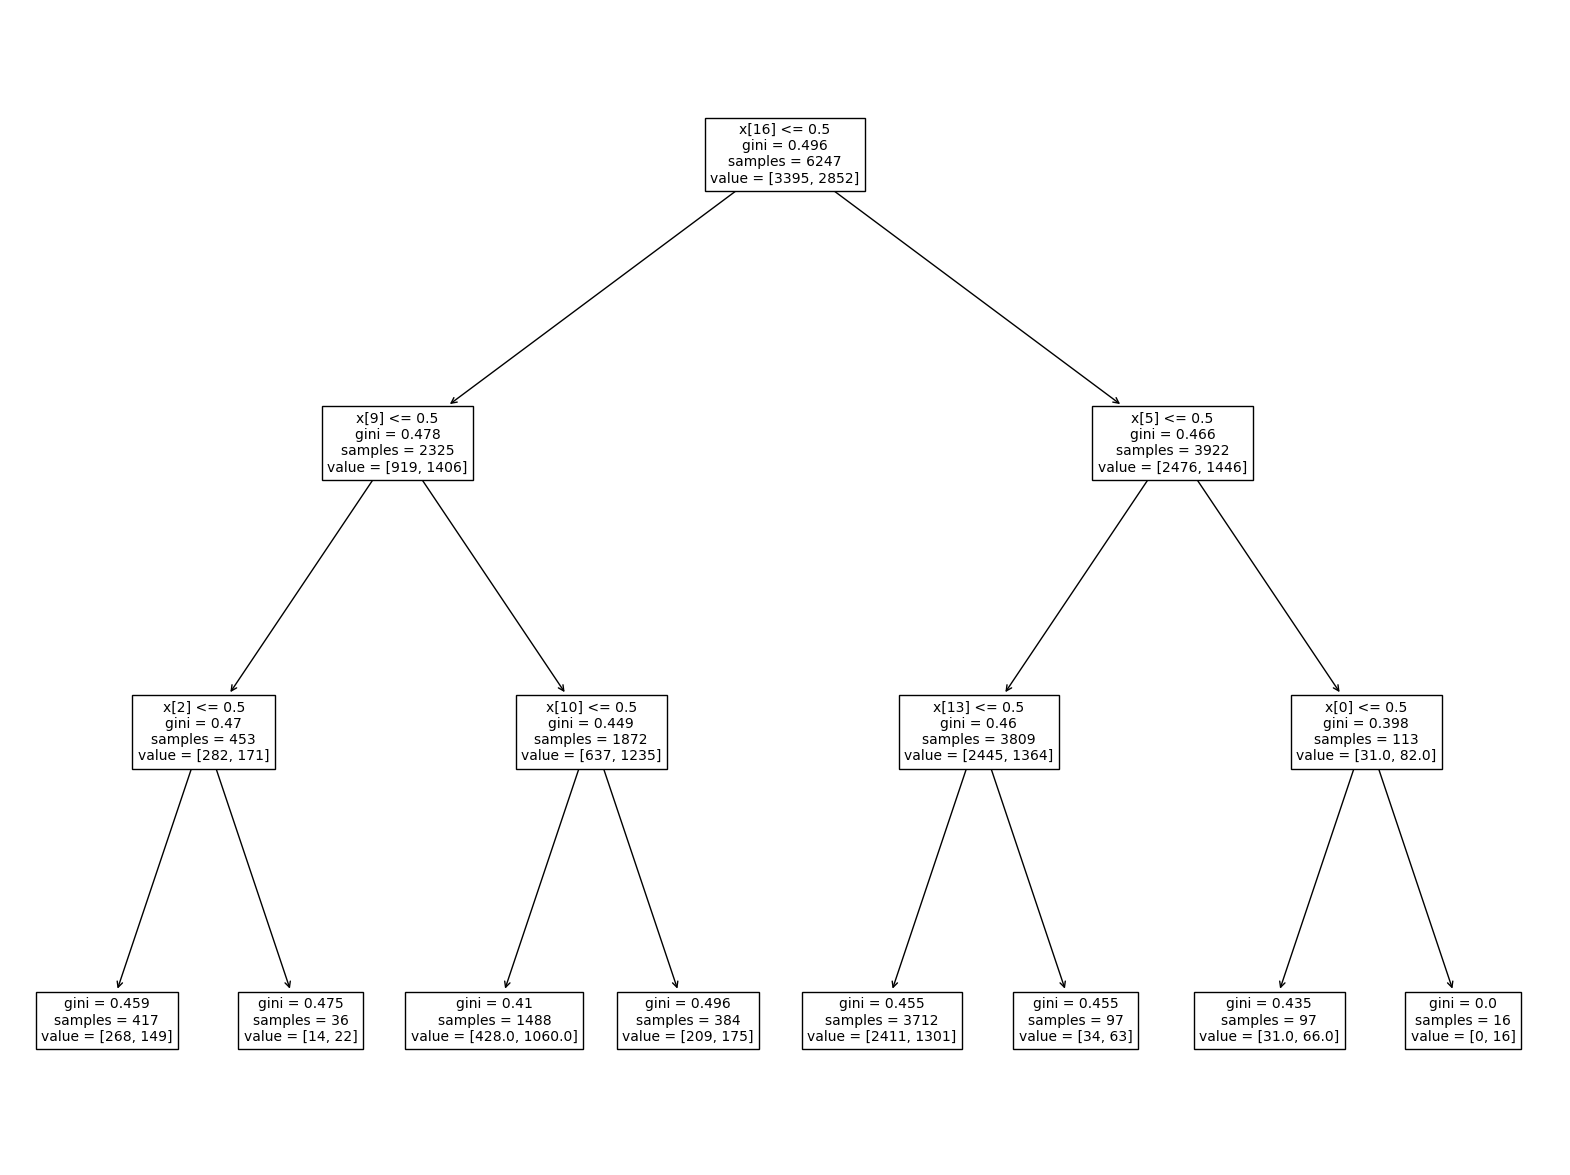

In [318]:
# instantiate tree
tree = DecisionTreeClassifier(max_depth=3, random_state=42)

# fit to our training set
tree.fit(X_train_encoded, y_train)

# plotting the figure
plt.figure(figsize=(20,15))  # set plot size (denoted in inches)
plot_tree(tree, fontsize=10)
plt.show();

In [319]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train_encoded)

In [320]:
log = LogisticRegression(random_state=42)
log.fit(X_train_sc, y_train)

LogisticRegression(random_state=42)

In [321]:
y_predict = log.predict(X_train_sc)
y_predict

array(['functional', 'functional', 'functional', ..., 'functional',
       'functional', 'functional'], dtype=object)

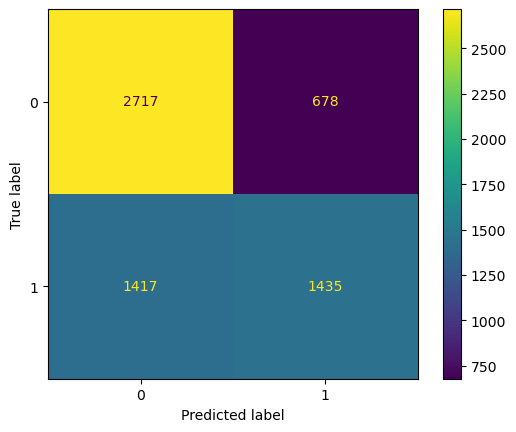

In [322]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_train, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [323]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

training_accuracy = accuracy_score(y_train, y_predict)
training_accuracy

0.6646390267328317

In [324]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_predict))

                precision    recall  f1-score   support

    functional       0.66      0.80      0.72      3395
non functional       0.68      0.50      0.58      2852

      accuracy                           0.66      6247
     macro avg       0.67      0.65      0.65      6247
  weighted avg       0.67      0.66      0.66      6247



In [325]:
X_train2 = X_train_encoded[['waterpoint_type_group_hand pump', 'management_group_user-group', 'extraction_type_class_other']]
X_train2.head()

,waterpoint_type_group_hand pump,management_group_user-group,extraction_type_class_other
0,1.0,1.0,0.0
1,1.0,1.0,0.0
2,1.0,1.0,0.0
3,1.0,1.0,0.0
4,1.0,1.0,0.0


In [326]:
log = LogisticRegression(random_state=42)
log.fit(X_train2, y_train)
y_predict2 = log.predict(X_train2)
y_predict2

array(['functional', 'functional', 'functional', ..., 'functional',
       'functional', 'functional'], dtype=object)

In [327]:
print(classification_report(y_train, y_predict2))

                precision    recall  f1-score   support

    functional       0.63      0.81      0.71      3395
non functional       0.66      0.43      0.52      2852

      accuracy                           0.64      6247
     macro avg       0.65      0.62      0.62      6247
  weighted avg       0.64      0.64      0.62      6247



In [328]:
#X_train3 = X_train_encoded[['region_Mwanza', 'payment_pay annually', 'lga_Biharamulo', 'lga_Bunda']]
#X_train3.head()

In [329]:
#log = LogisticRegression(random_state=42)
#log.fit(X_train3, y_train)
#y_predict3 = log.predict(X_train3)
#y_predict3

In [330]:
#print(classification_report(y_train, y_predict3))

In [331]:
X_train4 = X_train_encoded.loc[:, ~X_train_encoded.columns.str.contains('lga')]
X_train4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6247 entries, 0 to 6246
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   region_Kagera                     6247 non-null   float64
 1   region_Mara                       6247 non-null   float64
 2   region_Mwanza                     6247 non-null   float64
 3   region_Shinyanga                  6247 non-null   float64
 4   extraction_type_class_mechanical  6247 non-null   float64
 5   extraction_type_class_other       6247 non-null   float64
 6   management_group_other            6247 non-null   float64
 7   management_group_parastatal       6247 non-null   float64
 8   management_group_unknown          6247 non-null   float64
 9   management_group_user-group       6247 non-null   float64
 10  payment_other                     6247 non-null   float64
 11  payment_unknown                   6247 non-null   float64
 12  qualit

In [332]:
X_train4['management_group_user-group'].value_counts()

management_group_user-group
1.0    5480
0.0     767
Name: count, dtype: int64

In [333]:
X_train4['quality_group_milky'].value_counts()

KeyError: 'quality_group_milky'

In [ ]:
X_train4['quality_group_fluoride'].value_counts()

In [ ]:
X_train4['quality_group_salty'].value_counts()

In [ ]:
X_train4['quality_group_good'].value_counts()

In [ ]:
X_train4['quality_group_unknown'].value_counts()

In [ ]:
X_train4['payment_pay when scheme fails'].value_counts()

In [ ]:
X_train4['payment_other'].value_counts()

# Preliminary Model 2

In [ ]:
# instantiate tree
tree = DecisionTreeClassifier(max_depth=4, random_state=42)

# fit to our training set
tree.fit(X_train, y_train)

# plotting the figure
plt.figure(figsize=(20,15))  # set plot size (denoted in inches)
plot_tree(tree, fontsize=10)
plt.show();

# Feature Selection Part 2

In [ ]:
X_train.info()

In [ ]:
#to_drop2 = ['population', 'lga', 'permit', 'quantity']
#X_trainV2 = X_train.drop(labels= to_drop2, axis=1)
#X_trainV2.info()

In [ ]:
X_trainV2['extraction_type_class'].value_counts()

In [ ]:
#X_trainV2['extraction_type_class'].replace("handpump", "manual", inplace=True)
#X_trainV2['extraction_type_class'].replace("gravity", "other", inplace=True)
#X_trainV2['extraction_type_class'].replace("submersible", "mechanical", inplace=True)
#X_trainV2['extraction_type_class'].replace("motorpump", "mechanical", inplace=True)
#X_trainV2['extraction_type_class'].replace("rope pump", "manual", inplace=True)
#X_trainV2['extraction_type_class'].replace("wind-powered", "other", inplace=True)
#X_trainV2['extraction_type_class'].value_counts()

In [ ]:
X_trainV2['quality_group'].value_counts()

In [ ]:
#X_trainV2['quality_group'].replace("salty", "other", inplace=True)
#X_trainV2['quality_group'].replace("milky", "other", inplace=True)
#X_trainV2['quality_group'].replace("colored", "other", inplace=True)
#X_trainV2['quality_group'].replace("fluoride", "other", inplace=True)
#X_trainV2['quality_group'].value_counts()

In [ ]:
X_trainV2['payment'].value_counts()

In [ ]:
#X_trainV2['payment'].replace("pay when scheme fails", "other", inplace=True)
#X_trainV2['payment'].replace("pay monthly", "other", inplace=True)
#X_trainV2['payment'].replace("pay per bucket", "other", inplace=True)
#X_trainV2['payment'].replace("pay annually", "other", inplace=True)
#X_trainV2['payment'].value_counts()

In [ ]:
X_trainV2.info()

In [ ]:
ohe = OneHotEncoder(drop='first')

# fit the ohe on our training set
ohe.fit(X_trainV2)

# transform columns and convert our encoded matrix back into a dataframe
X_trainV2_encoded = pd.DataFrame(ohe.transform(X_trainV2).todense(),
                               columns=ohe.get_feature_names_out())

X_trainV2_encoded.info()

# Preliminary Model 3

In [ ]:
# instantiate tree
tree = DecisionTreeClassifier(max_depth=3, random_state=42)

# fit to our training set
tree.fit(X_trainV2_encoded, y_train)

# plotting the figure
plt.figure(figsize=(20,15))  # set plot size (denoted in inches)
plot_tree(tree, fontsize=10)
plt.show();

In [ ]:
log = LogisticRegression(random_state=42)
log.fit(X_trainV2_encoded, y_train)
y_predictV2 = log.predict(X_trainV2_encoded)
y_predictV2

In [ ]:
cm = confusion_matrix(y_train, y_predictV2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_train, y_predictV2))

In [ ]:
subset = X_trainV2_encoded[['extraction_type_class_mechanical', 'extraction_type_class_other', 'management_group_other', 'management_group_parastatal', 'management_group_unknown', 'management_group_user-group', 'waterpoint_type_group_hand pump']]
subset.info()

In [ ]:
log = LogisticRegression(random_state=42)
log.fit(subset, y_train)
y_pred_sub = log.predict(subset)
y_pred_sub

In [ ]:
cm = confusion_matrix(y_train, y_pred_sub)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_train, y_pred_sub))

# Changing regularization

In [ ]:
# changing the regularization to 0.5
log = LogisticRegression(random_state=42, C=0.5)
log.fit(X_train_encoded, y_train)
y_predict5 = log.predict(X_train_encoded)
y_predict5

In [ ]:
print(classification_report(y_train, y_predict5))

# Transforming the test set

In [ ]:
# isolating categorical columns
cat_columns_test = X_test[['region', 'extraction_type_class', 'management_group', 'payment', 'quality_group', 'source_class', 'waterpoint_type_group']].copy()

# instantiate the OneHotEncoder
ohe = OneHotEncoder(drop='first')

# fit the ohe on our training set
ohe.fit(cat_columns_test)

# transform columns and convert our encoded matrix back into a dataframe
X_test_encoded = pd.DataFrame(ohe.transform(cat_columns_test).todense(),
                               columns=ohe.get_feature_names_out())

X_test_encoded.head()

In [ ]:
X_test_encoded.info()

# Log Reg on the Test!

In [ ]:
y_test_predict = log.predict(X_test_encoded)
y_test_predict

In [ ]:
print(classification_report(y_test, y_test_predict))

In [ ]:
coefficients = log.coef_

print("Coefficients:", coefficients)